In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.Series(boston.target)

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
X.shape

(506, 13)

In [41]:
y.shape

(506,)

In [42]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
#Standadize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Train the Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [46]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

In [48]:
print(f"Train MSE: {train_mse: .2f}")
print(f"Train r2: {train_r2: .2f}")
print(f"test MSE: {test_mse: .2f}")
print(f"test r2: {test_r2: .2f}")

Train MSE:  1.73
Train r2:  0.98
test MSE:  6.21
test r2:  0.92


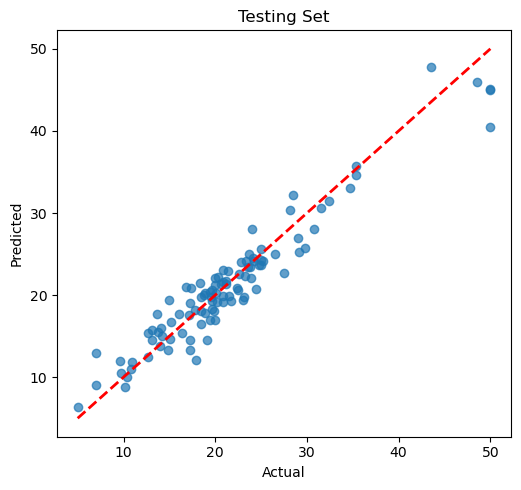

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set')

plt.tight_layout()
plt.show()